In [93]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns



In [94]:
vueltas = pd.read_csv("../dataset_todos_pilotos/final/laps_spain_final_v2.csv")
vueltas.drop(['nextPit'], axis = 1, inplace = True)

In [95]:
vueltas['makeStop'] = vueltas['makeStop'].shift(1)   
vueltas['makeStop'][0] = 0

/var/folders/pd/wpkltt694qx207z03w_cmlbh0000gn/T/ipykernel_2089/1494221414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vueltas['makeStop'][0] = 0


In [96]:
piloto="hamilton"

#vueltas = vueltas.drop(['Piloto'], axis = 1)

#Entrenamiento con todos pilotos -> TODO

vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020])]
vueltas_validation = vueltas[vueltas['anyo'].isin([2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

#vueltas_train = vueltas_train[vueltas_train['Piloto'] == "hamilton"]

#vueltas_validation = vueltas_validation[vueltas_validation['Piloto'] == "max_verstappen"]
vueltas_test = vueltas_test[vueltas_test['Piloto'] == piloto]

#vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_validation = vueltas_validation.drop(['anyo'], axis=1)

vueltas_test = vueltas_test.drop(['anyo'], axis=1)
vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
vueltas_test.drop(['Piloto'], axis = 1, inplace = True)
vueltas_validation.drop(['Piloto'], axis = 1, inplace = True)
vueltas_train = vueltas_train.drop(['Stint'], axis=1)
vueltas_validation = vueltas_validation.drop(['Stint'], axis=1)
vueltas_test = vueltas_test.drop(['Stint'], axis=1)

vueltas_train = vueltas_train.astype('float')
vueltas_validation = vueltas_validation.astype(float)
vueltas_test = vueltas_test.astype(float)

/var/folders/pd/wpkltt694qx207z03w_cmlbh0000gn/T/ipykernel_2089/3320588093.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vueltas_train.drop(['Piloto'], axis = 1, inplace = True)


In [97]:
vueltas_train_18 = vueltas_train[vueltas_train['anyo'] == 2018]

vueltas_train_18 = vueltas_train_18.drop('anyo', axis=1)
vueltas_train_18['makeStop'] = vueltas_train_18['makeStop'].astype('int32')
scaler = MinMaxScaler()
scaler.fit(vueltas_train_18)
vueltas_train_scaler_18= scaler.transform(vueltas_train_18)

In [98]:
vueltas_train_19 = vueltas_train[vueltas_train['anyo'] == 2019]

vueltas_train_19 = vueltas_train_19.drop('anyo', axis=1)
vueltas_train_19['makeStop'] = vueltas_train_19['makeStop'].astype('int32')

scaler.fit(vueltas_train_19)
vueltas_train_scaler_19= scaler.transform(vueltas_train_19)

In [99]:
vueltas_train_20 = vueltas_train[vueltas_train['anyo'] == 2020]

vueltas_train_20 = vueltas_train_20.drop('anyo', axis=1)
vueltas_train_20['makeStop'] = vueltas_train_20['makeStop'].astype('int32')

scaler.fit(vueltas_train_20)
vueltas_train_scaler_20= scaler.transform(vueltas_train_20)

In [100]:
vueltas_test_scaler = scaler.transform(vueltas_test)
vueltas_validation_scaler = scaler.transform(vueltas_validation)


In [101]:
trainX = []
trainY = []
testX = []
testY = []
validationX = []
validationY = []
loopback = 8 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler_18) -future +1):
    trainX.append(vueltas_train_scaler_18[i-loopback:i, 0:vueltas_train_18.shape[1]])
    trainY.append(vueltas_train_scaler_18[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_19) -future +1):
    trainX.append(vueltas_train_scaler_19[i-loopback:i, 0:vueltas_train_19.shape[1]])
    trainY.append(vueltas_train_scaler_19[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_20) -future +1):
    trainX.append(vueltas_train_scaler_20[i-loopback:i, 0:vueltas_train_20.shape[1]])
    trainY.append(vueltas_train_scaler_20[i + future - 1:i + future,5])
 
for i in range (loopback, len(vueltas_test_scaler) -future +1):
        testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
        testY.append(vueltas_test_scaler[i + future - 1:i + future,5])
        
    
for i in range (loopback, len(vueltas_validation_scaler) -future +1):
    validationX.append(vueltas_validation_scaler[i-loopback:i, 0:vueltas_validation.shape[1]])
    validationY.append(vueltas_validation_scaler[i + future - 1:i + future,5])

In [102]:
trainX, trainY, testX, testY, validationX, validationY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY), np.array(validationX), np.array(validationY)

In [103]:
trainX.shape[0]

3019

In [104]:
testX.shape

(56, 8, 18)

In [105]:
model = Sequential()
model.add(LSTM(256, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss= "binary_crossentropy")
model.summary()

2023-08-27 21:08:26.309540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-27 21:08:26.314236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-27 21:08:26.316449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8, 256)            281600    
                                                                 
 dropout_6 (Dropout)         (None, 8, 256)            0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 


2023-08-27 21:08:26.695396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-27 21:08:26.700533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-27 21:08:26.703993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 478,849
Trainable params: 478,849
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15


2023-08-27 21:08:27.783065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-27 21:08:27.785158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-27 21:08:27.790553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - ETA: 0s - loss: 0.1767

2023-08-27 21:08:37.887942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-27 21:08:37.896927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-27 21:08:37.900717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - 12s 112ms/step - loss: 0.1767 - val_loss: 0.1103
Epoch 2/15
38/38 [==============================] - 2s 66ms/step - loss: 0.1210 - val_loss: 0.1081
Epoch 3/15
38/38 [==============================] - 3s 87ms/step - loss: 0.1206 - val_loss: 0.1201
Epoch 4/15
38/38 [==============================] - 3s 79ms/step - loss: 0.1195 - val_loss: 0.1054
Epoch 5/15
38/38 [==============================] - 3s 74ms/step - loss: 0.1169 - val_loss: 0.1003
Epoch 6/15
38/38 [==============================] - 3s 84ms/step - loss: 0.1157 - val_loss: 0.0923
Epoch 7/15
38/38 [==============================] - 3s 67ms/step - loss: 0.1085 - val_loss: 0.1037
Epoch 8/15
38/38 [==============================] - 2s 63ms/step - loss: 0.1051 - val_loss: 0.1036
Epoch 9/15
38/38 [==============================] - 3s 67ms/step - loss: 0.1054 - val_loss: 0.0823
Epoch 10/15
38/38 [==============================] - 2s 64ms/step - loss: 0.0963 - val_loss: 0.0843
Epoch 11/15
38/38 

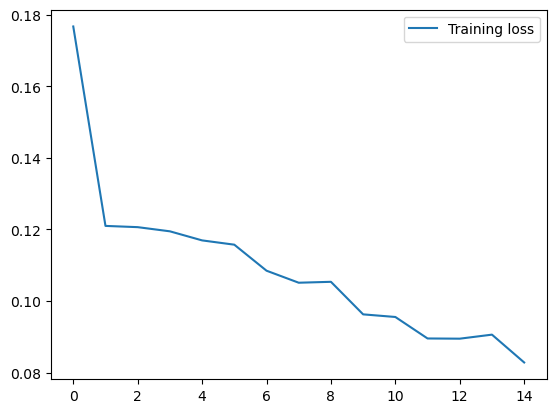

In [106]:
history = model.fit(trainX, trainY, epochs=15, batch_size=64, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [107]:
predictions_test = model.predict(testX)

2023-08-27 21:09:15.537835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-27 21:09:15.539634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-27 21:09:15.541793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 16ms/step


In [108]:
predictions_test

array([[0.00125209],
       [0.00154136],
       [0.00158444],
       [0.0016197 ],
       [0.00151127],
       [0.00120431],
       [0.00112187],
       [0.00099482],
       [0.0010177 ],
       [0.00103901],
       [0.00106234],
       [0.00112795],
       [0.00114922],
       [0.00118189],
       [0.00051574],
       [0.00045189],
       [0.00036676],
       [0.0003108 ],
       [0.00027171],
       [0.00024238],
       [0.00022276],
       [0.0002275 ],
       [0.00034806],
       [0.0003559 ],
       [0.00036818],
       [0.00038099],
       [0.00040403],
       [0.00043442],
       [0.00044664],
       [0.00045724],
       [0.00046913],
       [0.00047436],
       [0.00048234],
       [0.00048817],
       [0.00049621],
       [0.00051378],
       [0.00051932],
       [0.00052596],
       [0.00053165],
       [0.00053948],
       [0.00035138],
       [0.00037123],
       [0.00036098],
       [0.00035718],
       [0.00035116],
       [0.00034452],
       [0.00034323],
       [0.000

##PRUEBAS
 1. PILOTO A PILOTO, probar 4-5 pilotos
 2. Todos los pilotos (entrenamiento y test)

Entrenamiento: Del 18 al 21 y test 22 -> Calcular el threeshold aqui con 0.5
Entrenamiento: Del 18 al 20 y val 21 -> Sacar threeshold y con eso calcular del año 22 (ventanas y sin ventanas +-2)
Meter en la de todos los pilotos, meter una variable cualitativa con el name del piloto (no borrarla)
Todas estas pruebas con mse y con binary_crossentropy

Entrenar modelos varias veces para ver variabilidad, es decir, cada prueba 5 veces para logearlos en fichero y sacar media


Probar con mas capas, otras configuraciones de red neuronal (mirar parámetros, modificar los batches (mayor mejor), modificar capas, vector de la capa...)






In [109]:
clases = np.unique(validationY[:,0]) 
clases

array([0., 1.])

In [110]:
f = lambda x: np.argwhere(x == clases)
f = np.vectorize(f)
y_real = f(validationY[:,0])

In [111]:
validationY[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
y_real

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
#AQUI ES CON LOS DATOS DE VALIDADACION
predictions = model.predict(validationX)

33/33 [==============================] - 0s 11ms/step


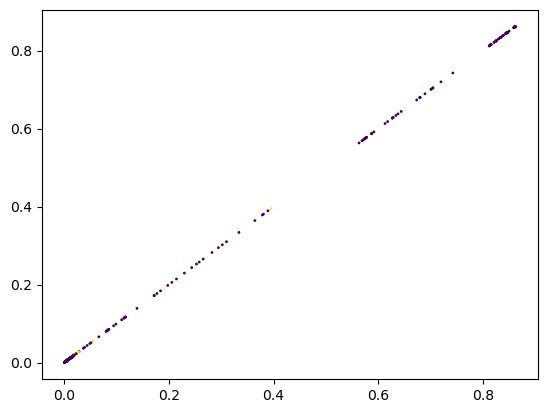

In [114]:
plt.scatter(predictions[:,0], predictions[:,0], s=1, c=y_real+1)

In [115]:
y_real_train = f(trainY[:,0])

In [116]:
y_real_train

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
predictions_test = model.predict(testX)

2/2 [==============================] - 0s 18ms/step


In [118]:
y_real_test =  f(testY[:,0])

In [119]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(predictions, y_real, test_size=0.3, stratify=y_real)

In [120]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression(random_state=0, penalty=None).fit(predictions, y_real) # Esto es de validacion

In [121]:
pred_test_2 = rl.predict(predictions_test)

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_real_test, pred_test_2)
metricas = classification_report(y_real_test, pred_test_2)

/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
print(cm)
print(metricas)

[[54  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.00      0.00      0.00         2

    accuracy                           0.96        56
   macro avg       0.48      0.50      0.49        56
weighted avg       0.93      0.96      0.95        56

